**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the Data**

In [2]:
liver_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient.csv")

**Exploratory Data Analysis (EDA)**

In [3]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease'],
      dtype='object')

In [5]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
liver_data.shape

(583, 11)

In [7]:
liver_data.liver_disease.value_counts()

1    416
0    167
Name: liver_disease, dtype: int64

In [8]:
liver_data[liver_data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [9]:
liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

**Pre-processing**

In [10]:
# One hot encoding
liver_data = pd.get_dummies(liver_data, columns=['Gender'])
liver_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


**Separating Input & Output Features**

In [11]:
x = liver_data.drop('liver_disease', axis=1)
y = liver_data.liver_disease

**Split the Data**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Train the Model - Decision Tree Classifier**

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

**Evaluating the Model**

In [15]:
from sklearn.metrics import accuracy_score
print('Test accuracy: ', accuracy_score(y_test, dtree.predict(x_test))*100)

Test accuracy:  71.7948717948718


In [17]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(dtree, out_file=None, feature_names=x_test.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph1 = graphviz.Source(dot_data)

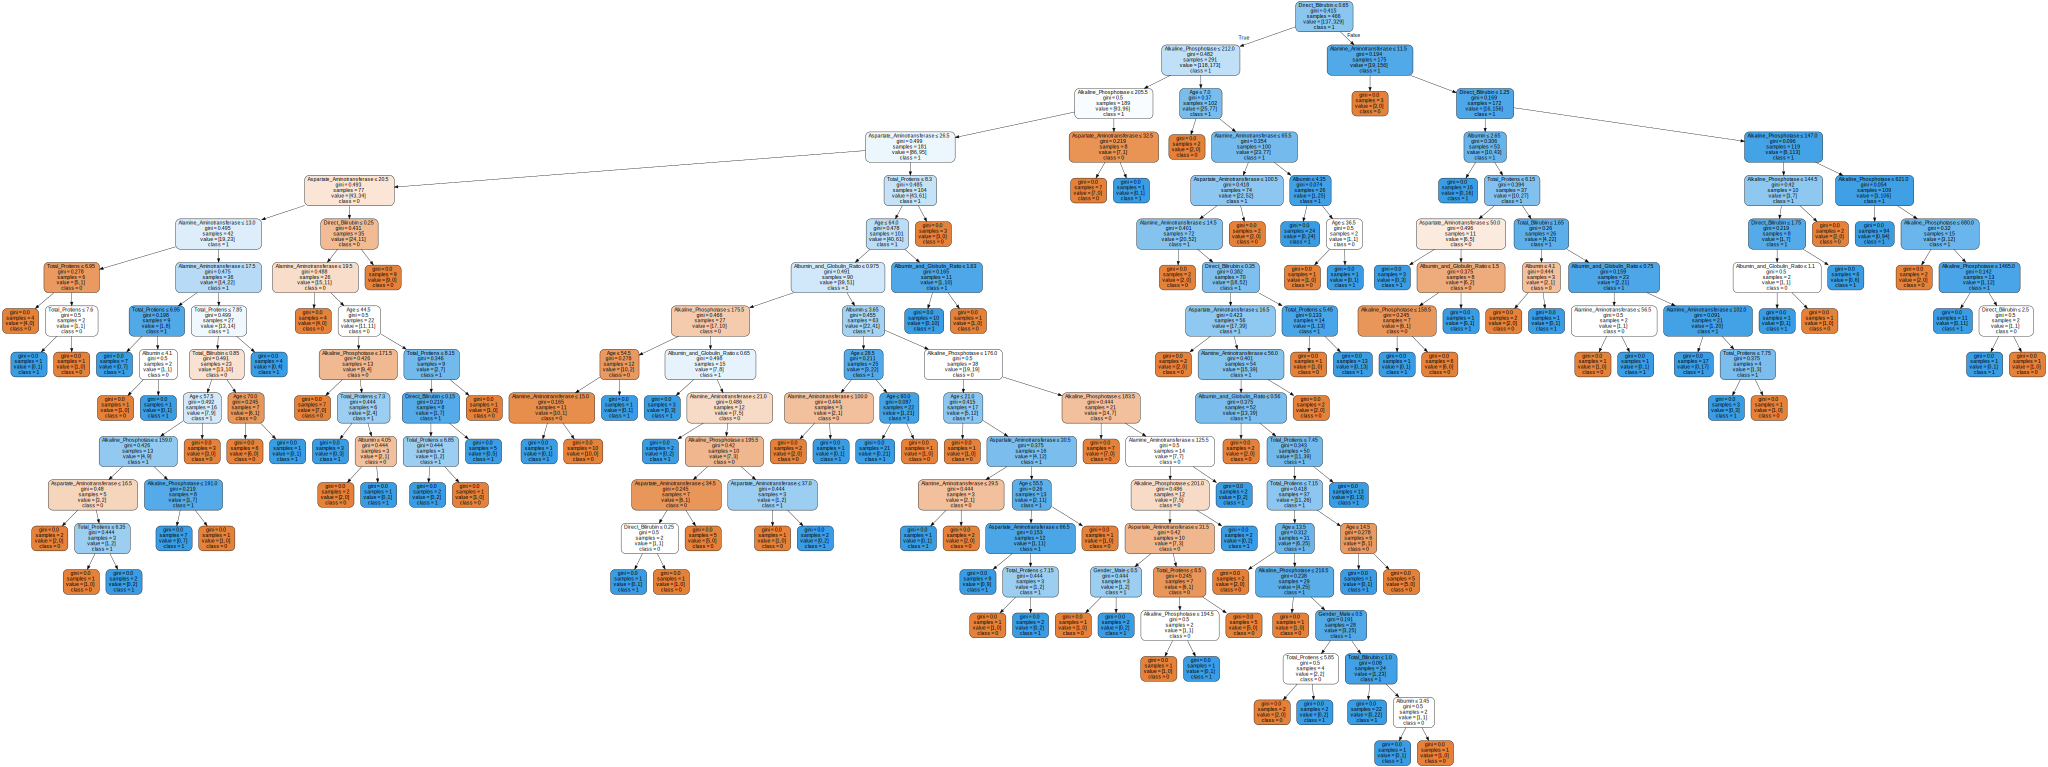

In [18]:
graph1

**Training the Model - Random Forest Classifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train) 

RandomForestClassifier(random_state=1)

**Evaluating the Model**

In [23]:
from sklearn.metrics import accuracy_score
print('Test accuracy: ', accuracy_score(y_test, rfc.predict(x_test))*100)

Test accuracy:  75.21367521367522
